In [8]:
import sys
sys.path.append('../../')
import numpy as np
from src.util.config import Config

**Setting**
create specific Single Item Auction setting

In [9]:
# parameter mechanism
bidder = ['1', '1']
o_space = {'1': [0.0, 2.0]}
a_space = {'1': [0.0, 1.5]}
param_prior = {
    'distribution':'affiliated_values',
    }
param_util = {
    'payment_rule': 'first_price', 
    'tie_breaking': 'lose', 
    'utility_type': 'QL'
    }
# parameter approximation game
n = 50
m = 50

config = Config()
config.create_config_game("single_item", bidder, o_space, a_space, param_prior, param_util, n, m)
game = config.create_game()
if not game.mechanism.own_gradient:
    game.get_utility()
    print("utilities computed")

utilities computed


In [10]:
# parameter learner
max_iter = int(2e3)
tol = 1e-4
stop_criterion = 'util_loss'
param_learner = {
    "mirror_map": "euclidean",
    "steprule_bool": True,
    "eta": 0.1,
    "beta": 0.5,
}

config.create_config_learner("soma", max_iter, tol, stop_criterion, param_learner)
learner = config.create_learner()

Run Learning Algorithm

In [11]:
#create and initialize strategies
strategies = config.create_strategies(game, "random")

# run learn algorithm
learner.run(game, strategies, disable_tqdm_bool=False, print_result_bool=True, save_history_bool=True)

100%|████████████████████| 2.00k/2.00k [00:08<00:00, 241it/s]

No convergence with stopping criterion
Current value of (util_loss): 0.00258
Best value of (util_loss)   : 0.00258)


Visualization of the learning process and the final result

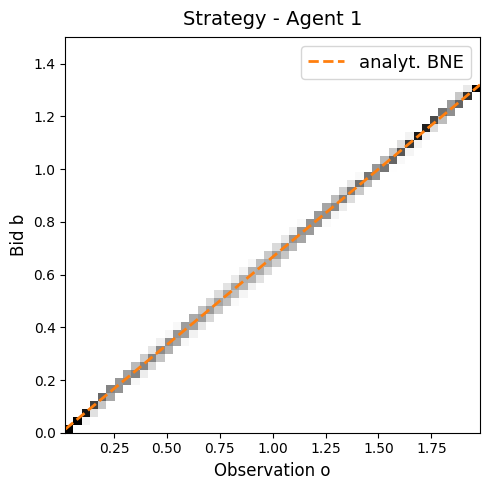

In [12]:
bne = game.mechanism.get_bne('1', strategies['1'].o_discr)
strategies['1'].plot(grad=False, metrics=False, beta=bne)